 Implement gradient descent for linear regression, visualize the cost function convergence, and show how the learning rate affects optimization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [ ]:
X, y, coef = make_regression(n_samples=100, n_features=1, noise=10, bias=4, coef=True)
y = y.reshape(-1, 1)  # Reshape y to be a column vector

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # X_b now contains the bias term

In [ ]:
def predict(X, theta):
  return X.dot(theta) #weight

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradients = (1 / m) * X.T.dot(predict(X, theta) - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print cost at intervals for monitoring
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta, cost_history

In [ ]:
# Plot cost function convergence
def plot_cost_convergence(cost_history, learning_rate):
    plt.plot(cost_history, label=f"LR={learning_rate}")
    plt.title("Cost Function Convergence")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.legend()

In [ ]:
theta_initial = np.random.randn(2, 1)
num_iterations = 1000

In [ ]:
learning_rates = [0.01, 0.1, 0.5]

Iteration 0: Cost 534.500098764606
Iteration 100: Cost 109.54959780121848
Iteration 200: Cost 54.8803858456982
Iteration 300: Cost 47.8406165677007
Iteration 400: Cost 46.93321805862562
Iteration 500: Cost 46.816140367134025
Iteration 600: Cost 46.80101873787835
Iteration 700: Cost 46.799063576386
Iteration 800: Cost 46.79881050860791
Iteration 900: Cost 46.79877771637468
Iteration 0: Cost 448.2103616139175
Iteration 100: Cost 46.79877301951943
Iteration 200: Cost 46.798772827345104
Iteration 300: Cost 46.798772827345104
Iteration 400: Cost 46.798772827345104
Iteration 500: Cost 46.798772827345104
Iteration 600: Cost 46.798772827345104
Iteration 700: Cost 46.798772827345104
Iteration 800: Cost 46.798772827345104
Iteration 900: Cost 46.798772827345104
Iteration 0: Cost 166.2865830729968
Iteration 100: Cost 46.79877282734509
Iteration 200: Cost 46.79877282734509
Iteration 300: Cost 46.79877282734509
Iteration 400: Cost 46.79877282734509
Iteration 500: Cost 46.79877282734509
Iteration 600

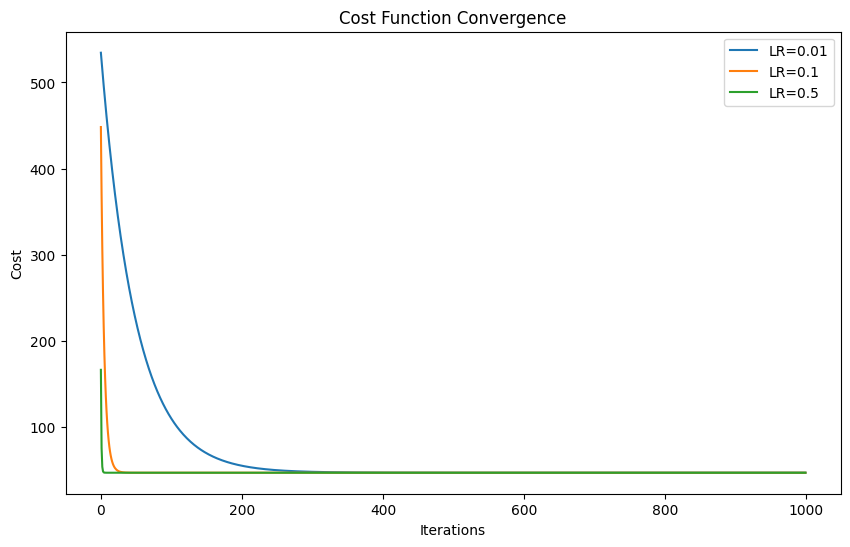

In [ ]:
plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    theta, cost_history = gradient_descent(X_b, y, theta_initial.copy(), learning_rate, num_iterations)
    plot_cost_convergence(cost_history, learning_rate)

plt.show()